![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Diel cycle
</b>
</span>

---
**Notebook version**: `1` (14 May 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- `DielCycle` is a class for plotting diel cycles of time series data.
- Uses the time info from the timestamp (datetime) index to aggregate. Aggregation is done on unique times found in the index.
- For example, if the time part of the datetime index is hourly (e.g. 0:00, 01:00, 02:00 etc.), then hourly averages are calculated.

</br>

# **Imports**

In [1]:
import importlib.metadata
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from datetime import datetime
import diive.configs.exampledata as ed
from diive.core.plotting.dielcycle import DielCycle
import warnings
from diive.core.io.files import load_parquet
warnings.filterwarnings('ignore')
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Docstring**

In [2]:
# help(DielCycle)

</br>

# **Load data**

In [3]:
df = load_parquet(filepath=r"21.2_FluxProcessingChain_L4.1_NEE-L0_PRELIMINARY.parquet")
co2 = df['NEE_L3.1_L3.3_CUT_QCF_gfRF'].copy()
df = load_parquet(filepath=r"22.2_FluxProcessingChain_L4.1_LE-L0_PRELIMINARY.parquet")
le = df['LE_L3.1_L3.3_CUT_NONE_QCF_gfRF'].copy()
display(co2)
display(le)

Loaded .parquet file 21.2_FluxProcessingChain_L4.1_NEE-L0_PRELIMINARY.parquet (0.140 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 
Loaded .parquet file 22.2_FluxProcessingChain_L4.1_LE-L0_PRELIMINARY.parquet (0.075 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2024-02-06 19:15:00    6.803436
2024-02-06 19:45:00    6.803436
2024-02-06 20:15:00    4.671822
2024-02-06 20:45:00    4.671822
2024-02-06 21:15:00    4.975642
                         ...   
2025-06-01 22:45:00    4.593991
2025-06-01 23:15:00    5.964315
2025-06-01 23:45:00    5.964315
2025-06-02 00:15:00    6.323336
2025-06-02 00:45:00    6.323336
Freq: 30min, Name: NEE_L3.1_L3.3_CUT_QCF_gfRF, Length: 23100, dtype: float64

TIMESTAMP_MIDDLE
2024-02-06 19:15:00     2.650613
2024-02-06 19:45:00     2.650613
2024-02-06 20:15:00     2.407813
2024-02-06 20:45:00     2.407813
2024-02-06 21:15:00     2.861070
                         ...    
2025-06-01 22:45:00    21.221625
2025-06-01 23:15:00    20.625220
2025-06-01 23:45:00    20.625220
2025-06-02 00:15:00     4.754998
2025-06-02 00:45:00     4.754998
Freq: 30min, Name: LE_L3.1_L3.3_CUT_NONE_QCF_gfRF, Length: 23100, dtype: float64

</br>

# **Plot diel cycle**

## Plot monthly diel cycles without specifying axis

In [4]:
# dc = DielCycle(series=co2)
# title = r'$\mathrm{Mean\ CO_2\ flux\ (Mar\ 2024 - Feb\ 2025)}$'
# units = r'($\mathrm{µmol\ CO_2\ m^{-2}\ s^{-1}}$)'
# dc.plot(title=title, txt_ylabel_units=units, each_month=True, legend_n_col=2);

## Plot diel cycle across all data (all months) without specifying axis

In [5]:
# dc = DielCycle(series=co2)
# title = r'$\mathrm{Mean\ CO_2\ flux\ (Mar\ 2024 - Feb\ 2025)}$'
# units = r'($\mathrm{µmol\ CO_2\ m^{-2}\ s^{-1}}$)'
# dc.plot(title=title, color="#4CAF50", txt_ylabel_units=units, each_month=False);

## Plot into existing axis

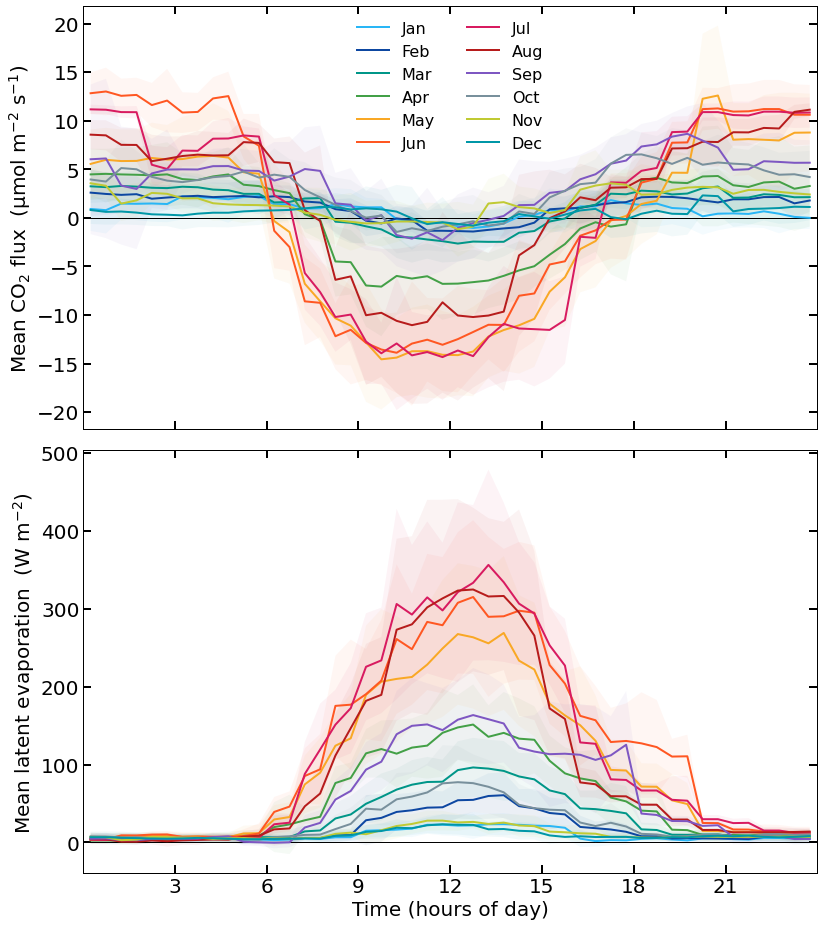

In [6]:
fig = plt.figure(facecolor='white', figsize=(12, 14), dpi=72)
gs = gridspec.GridSpec(2, 1)  # rows, cols
gs.update(wspace=0.3, hspace=0.05, left=0.08, right=0.93, top=0.93, bottom=0.07)
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

# CO2
dc_co2 = DielCycle(series=co2)
title = ""
units = r'($\mathrm{µmol\ m^{-2}\ s^{-1}}$)'
dc_co2.plot(ax=ax, title=title, txt_ylabel_units=units, each_month=True, legend_n_col=2, ylabel=r"$\mathrm{Mean\ CO_{2}\ flux}$", 
            showgrid=False, show_xticklabels=False, show_xlabel=False)

# Latent evaporation
dc_le = DielCycle(series=le)
title = ""
units = r'($\mathrm{W\ m^{-2}}$)'
dc_le.plot(ax=ax2, title=title, txt_ylabel_units=units, each_month=True, legend_n_col=2, ylabel=r'$\mathrm{Mean\ latent\ evaporation}$', showgrid=False, show_xticklabels=True, show_legend=False)
fig.show()

# End of notebook

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-06-04 15:20:50
